# Training

## Risoluzione dipendenze e caricamento dataset

In [302]:
# Installa tutte le dipendenze.
!pip install -r requirements.txt

In [345]:
# Importa tutte le librerie necessarie.
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [346]:
# Carica i due dataset di training e di test.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [347]:
# Unisco training set e test set in un unico dataset.
# Faccio questo perché così sarà più facile applicare modifiche a entrambi senza dover ripetere codice.
dataset = pd.concat([train, test], axis = 0)

## Analisi e trasformazione del dataset

In [348]:
# Vediamo quanti sono gli esempi nel dataset set e quante sono le feature.
dataset.shape

(6499, 23)

In [349]:
# Mi faccio un'idea di come è fatto il dataset set, visualizzandone le prime 5 righe.
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,w,f,n,f,w,b,g,...,s,w,w,p,w,t,p,w,s,g
1,e,x,f,n,t,n,f,c,b,w,...,s,p,g,p,w,o,p,k,v,d
2,p,f,s,n,t,p,f,c,n,w,...,s,w,w,p,w,o,p,k,v,u
3,e,f,y,n,t,l,f,c,b,n,...,y,w,w,p,w,o,p,k,s,p
4,p,f,y,e,f,f,f,c,n,b,...,k,w,w,p,w,o,e,w,v,d


In [350]:
# Mostro tutti i valori che occorrono in ogni colonna presente nel dataset.
for i in dataset.columns:
    print(i, dataset[i].unique())

class ['e' 'p']
cap-shape ['x' 'f' 'b' 'k' 's' 'c']
cap-surface ['s' 'f' 'y' 'g']
cap-color ['w' 'n' 'e' 'p' 'g' 'r' 'y' 'b' 'c' 'u']
bruises ['f' 't']
odor ['n' 'p' 'l' 'f' 'c' 's' 'y' 'a' 'm']
gill-attachment ['f' 'a']
gill-spacing ['w' 'c']
gill-size ['b' 'n']
gill-color ['g' 'w' 'n' 'b' 'p' 'u' 'h' 'o' 'k' 'y' 'e' 'r']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'e' 'r' 'c']
stalk-surface-above-ring ['s' 'k' 'y' 'f']
stalk-surface-below-ring ['s' 'y' 'k' 'f']
stalk-color-above-ring ['w' 'p' 'g' 'n' 'b' 'o' 'e' 'c' 'y']
stalk-color-below-ring ['w' 'g' 'b' 'p' 'n' 'o' 'e' 'c' 'y']
veil-type ['p']
veil-color ['w' 'o' 'n' 'y']
ring-number ['t' 'o' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['w' 'k' 'n' 'h' 'y' 'o' 'r' 'b' 'u']
population ['s' 'v' 'a' 'y' 'c' 'n']
habitat ['g' 'd' 'u' 'p' 'l' 'm' 'w']


In [351]:
# Mostro una descrizione riassuntiva di tutto il dataset set.
dataset.describe().T

,count,unique,top,freq
class,6499,2,e,3365
cap-shape,6499,6,x,2956
cap-surface,6499,4,y,2602
cap-color,6499,10,n,1823
bruises,6499,2,f,3802
odor,6499,9,n,2833
gill-attachment,6499,2,f,6331
gill-spacing,6499,2,c,5451
gill-size,6499,2,b,4496
gill-color,6499,12,b,1398


In [352]:
# Vediamo se ci sono colonne con valori mancanti.
cols_with_missing = [col for col in dataset.columns
                     if dataset[col].str.contains('\?').any()]
print(cols_with_missing)

['stalk-root']


La colonna 'stalk-root' contiene dei valori mancanti (indicati con '?').
La mancanza di valori in questa colonna è dovuta in particolare al fatto che tali dati non sono stati raccolti,
non che non esistano.
Una prima banale e possibile soluzione al problema è quella di eliminare questa colonna.
Un'altra possibile soluzione è quella di sostituire tutti i valori mancanti con il valore che occorre il maggior
numero di volte nella colonna.
Per capire quale tra queste due soluzioni sarebbe apparentemente migliore, il grafico qui sotto mostra la
distribuzione dei valori per questa colonna.

In [353]:
# Funzione per visualizzare la distribuzione dei valori nella colonna 'stalk-root' del dataset.
def plotStalkRootDistrib(data):
    print(data['stalk-root'].value_counts())
    plot = data['stalk-root'].value_counts().plot.pie(figsize = (5, 5))

b    3007
?    2007
e     889
c     452
r     144
Name: stalk-root, dtype: int64


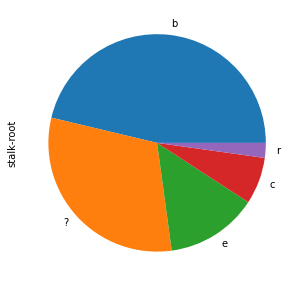

In [354]:
plotStalkRootDistrib(dataset)

Osservando il grafico, si evince che ben più della metà dei valori nella colonna NON sono mancanti.
Eliminando la colonna, quindi, perderemmo molta informazione!

Decido quindi di utilizzare il secondo approccio.
Dal grafico è evidente che il valore più frequente per la feature è 'b': sostituisco quindi tutti i valori mancanti con 'b'.

In [355]:
# Funzione per rimpiazzare tutti i valori mancanti nel dataset.
def replaceMissing(data):
    data['stalk-root'] = data['stalk-root'].replace('?', 'b')

In [356]:
replaceMissing(dataset)

b    5014
e     889
c     452
r     144
Name: stalk-root, dtype: int64


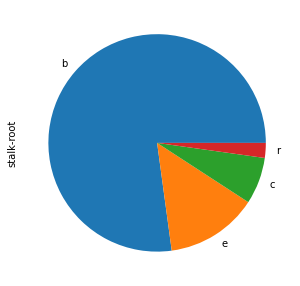

In [357]:
# Visualizziamo la nuova distribuzione.
plotStalkRootDistrib(dataset)

Le feature sono tutte non numeriche: devo trasformarle in numeriche per poterci lavorare.
Per farlo, applicherò la tecnica Label Encoding sulla variabile target e

Per farlo, applicherò la tecnica Label Encoding sulle feature binarie (e sulla variabile target) e la tecnica
One-Hot Encoding sulle feature che possono assumere più di 3 valori.
È un buon compromesso tra il non aggiungere un numero eccessivo di colonne (per non rendere il dataset troppo
complesso, in modo da non compromettere troppo le performance) ed evitare di imprimere un ordinamento ai valori
delle diverse feature, che per loro natura molto spesso non hanno un vero e proprio ordinamento.

In [358]:
# Lista delle colonne binarie.
binary_columns = ['class', 'bruises', 'gill-size', 'stalk-shape', 'veil-type']

# Funzione per trasformare le colonne del dataset in numeriche.
# Restituisce il dataset trasformato
def transformCols2Numeric(data):
    
    le_encoder = LabelEncoder()
    
    # Lista delle colonne NON binarie.
    multi_value_columns = data.columns.difference(binary_columns)
    
    # Applica il One-Hot Encoding su tutte le colonne NON binarie.
    result = pd.get_dummies(data, columns = multi_value_columns, drop_first = True)
    
    # Applica il Label Encoding su tutte le colonne binarie.
    for col in binary_columns:
        result[col] = le_encoder.fit_transform(result[col])
            
    return result

In [359]:
dataset = transformCols2Numeric(dataset)
dataset

,class,bruises,gill-size,stalk-shape,veil-type,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,...,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,veil-color_o,veil-color_w,veil-color_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,1,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
4,1,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,1,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1621,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1622,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1623,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


## Addestramento

In [360]:
# Suddivido nuovamente il dataset trasformato in training e test.
train = dataset.iloc[0:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

# Suddivido entrambi i dataset in features (X) e target (y).
X_train = train.drop('class', axis = 1)
y_train = train['class']
X_test = test.drop('class', axis = 1)
y_test = test['class']

In [361]:
# Creo e addestro il modello.
# Ho deciso di utilizzare un RandomForestClassifier come classificatore, ovvero una "foresta" di alberi di
# decisione. Questo modello costruisce una moltitudine di alberi di decisione: la predizione dell'intera foresta
# corrisponde alla media delle predizioni dei singoli alberi che la compongono.
# Questo approccio garantisce prestazioni solitamente migliori che non addestrando un singolo albero di decisione.
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [362]:
# Valuto l'accuratezza sul train set.
model.score(X_train, y_train)

1.0

In [363]:
# Valuto l'accuratezza sul test set.
model.score(X_test, y_test)

1.0

## Analisi dei risultati
L'accuratezza del modello sembra essere estremamente alta, il che sinceramente mi lascia qualche perplessità sulla validità dei passaggi di trasformazione che ho applicato (non vorrei aver involontariamente "barato").

Qui sotto farò ulteriori analisi sul modello addestrato.

In [364]:
# Mostriamo i valori di importanza relativa calcolati dal modello per le varie feature.
print("Feature importances:")
print(model.feature_importances_)

Feature importances:
[4.10831363e-02 9.17704884e-02 1.34384598e-02 0.00000000e+00
 8.96443966e-04 1.30218676e-03 3.07293323e-03 1.51296988e-03
 2.38935520e-03 3.91527930e-04 2.32594966e-04 4.23098607e-03
 7.02687978e-03 3.59713730e-04 1.20636715e-03 1.16586623e-03
 6.43117860e-04 1.28646415e-03 2.79096247e-04 6.39037694e-03
 2.49783263e-03 2.02420500e-03 6.62449581e-04 1.54474470e-03
 9.79547660e-04 8.07115257e-04 4.13013954e-03 6.71860029e-06
 1.04023548e-03 1.48213301e-03 1.41822421e-04 4.94895348e-03
 2.44099409e-04 2.86891091e-02 5.19427606e-03 2.64008795e-03
 6.27303498e-03 4.20518693e-03 9.33324439e-03 8.62424899e-04
 1.29213292e-02 7.33535140e-02 6.39078721e-03 9.78986511e-04
 2.06167827e-01 2.09660016e-02 9.09361161e-03 1.03946742e-02
 1.31369243e-03 5.21706899e-03 5.49731695e-03 2.99910120e-02
 3.26554652e-03 7.79781534e-03 5.62844096e-03 2.06039350e-03
 9.17370319e-03 6.47969349e-04 3.32835216e-02 3.99726722e-02
 1.09532846e-02 7.69585982e-03 0.00000000e+00 8.69694391e-03
 2.

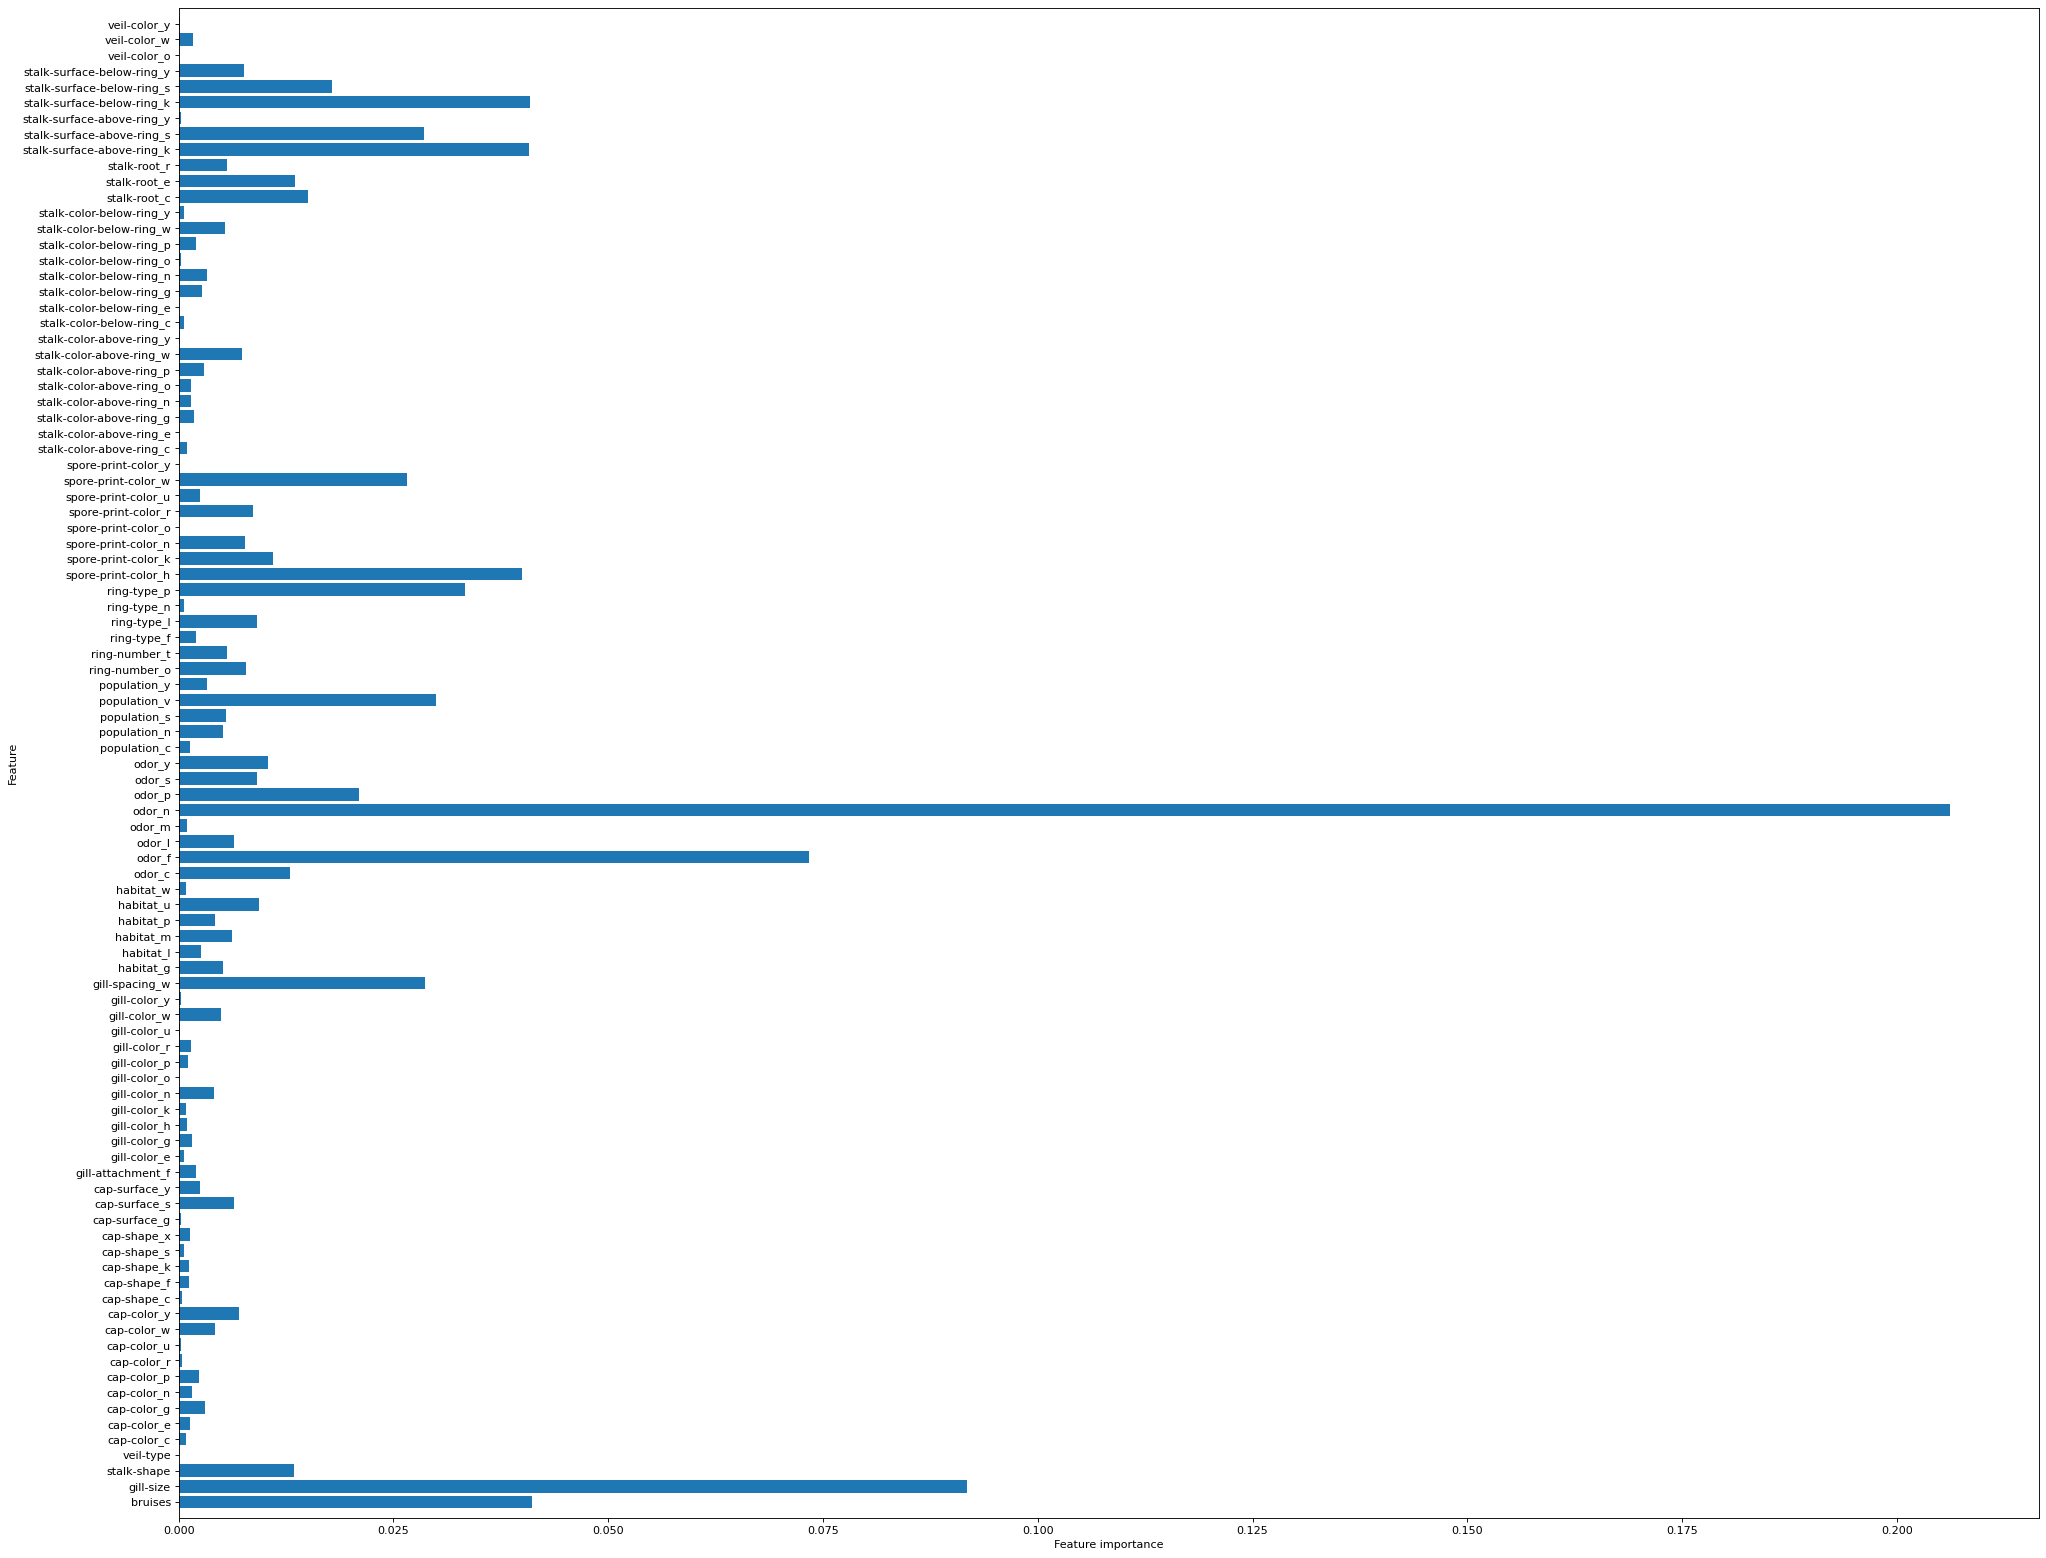

In [365]:
# Grafichiamo tali valori.
def plot_feature_importance(model):
    n_features = X_train.shape[1]
    plt.figure(figsize = (30, 25), dpi = 80)
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importance(model)